In [24]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import re
import ast
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [25]:
os.chdir(os.path.expanduser("~/Documents/Projects/Data/PCPP/parts/x_csv_files/"))
df = pd.read_csv('monitor_csv.csv')

In [26]:
sns.set_style('whitegrid')

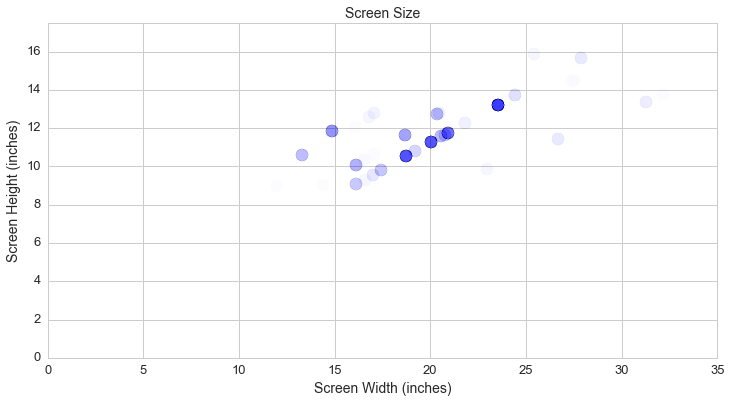

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(df.screen_x, df.screen_y, alpha=0.01, s=150)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([0,35,0,35./2])
plt.title('Screen Size', fontsize=14)
plt.xlabel('Screen Width (inches)', fontsize=14)
plt.ylabel('Screen Height (inches)', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/screen_size.png'))

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text yticklabel objects>)

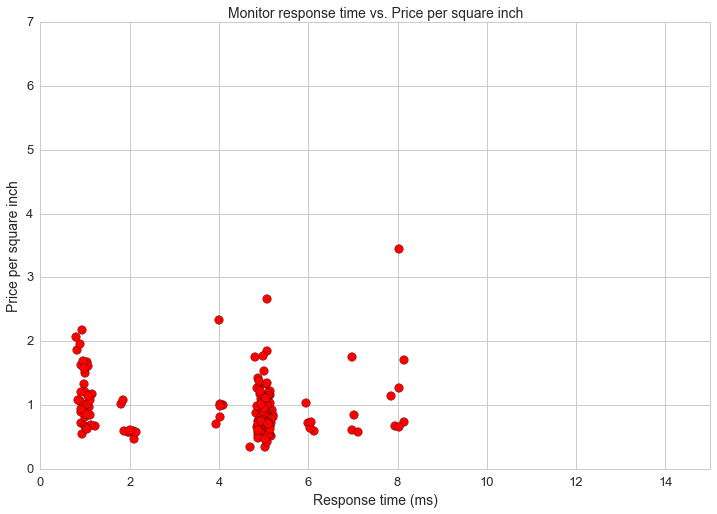

In [22]:
df1 = df[(df.avg>0)&(df.response>0)]
plt.figure(figsize=(12,8))
df1['response_jitter'] = [x+np.random.randn()/10 for x in df1.response]
#plt.scatter(df1[df1.IPS=="Yes"].response_jitter, df1[df1.IPS=="Yes"].price_per_sq_in, c='b', s=75)
plt.scatter(df1[df1.IPS=="No"].response_jitter, df1[df1.IPS=="No"].price_per_sq_in, c='r', s=75)
plt.title('Monitor response time vs. Price per square inch', fontsize=14)
plt.axis([0,15,0,7])
plt.xlabel('Response time (ms)', fontsize=14)
plt.ylabel('Price per square inch', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/screen_size.png'))

(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 <a list of 7 Text yticklabel objects>)

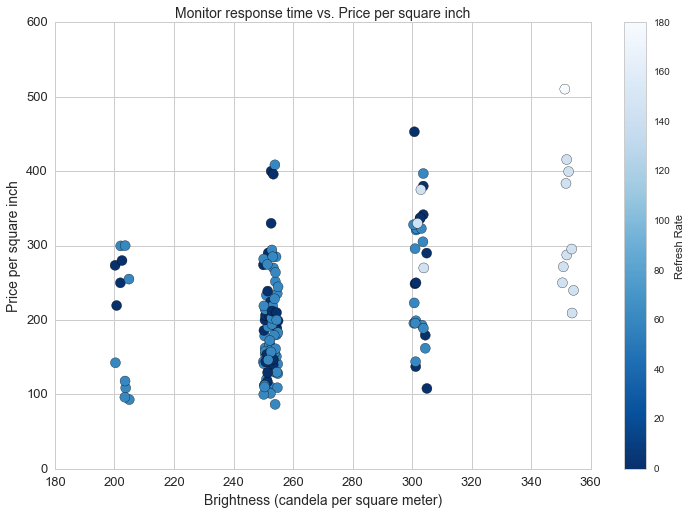

In [56]:
df2 = df[(df.Brightness>0)&(df.avg>0)&(df.Recommended_Resolution=='1920 x 1080')&(df.Aspect_Ratio=='16:9')]
df2['Brightness_jitter'] = [x+np.random.rand()*5 for x in df2.Brightness]
plt.figure(figsize=(12,8))
plt.scatter(df2.Brightness_jitter, df2.avg, c=df2.refresh, cmap='Blues_r', s=100)
plt.colorbar(label='Refresh Rate')
plt.title('Monitor response time vs. Price per square inch', fontsize=14)
plt.axis([180,360,0,600])
plt.xlabel('Brightness (candela per square meter)', fontsize=14)
plt.ylabel('Price per square inch', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/screen_size.png'))

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text yticklabel objects>)

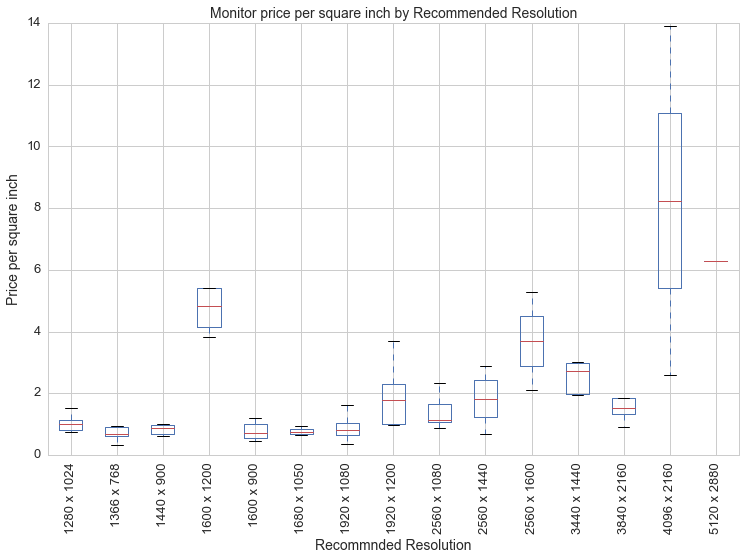

In [59]:
df[df.avg>0].boxplot(column='price_per_sq_in', by='Recommended_Resolution', rot=90, figsize=(12,8))
plt.title('Monitor price per square inch by Recommended Resolution', fontsize=14)
plt.suptitle('')
plt.xlabel('Recommnded Resolution', fontsize=14)
plt.ylabel('Price per square inch', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/screen_size.png'))

(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.]),
 <a list of 9 Text yticklabel objects>)

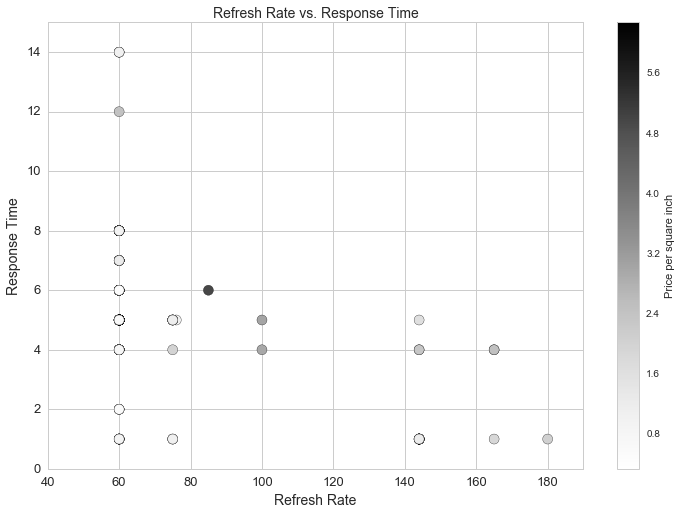

In [66]:
df3 = df[(df.refresh>0)&(df.response>0)&(df.price_per_sq_in>0)]
plt.figure(figsize=(12,8))
plt.scatter(df3.refresh, df3.response, c=df3.price_per_sq_in, s=100)
plt.colorbar(label='Price per square inch')
plt.title('Refresh Rate vs. Response Time', fontsize=14)
plt.axis([40,190,0,15])
plt.xlabel('Refresh Rate', fontsize=14)
plt.ylabel('Response Time', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

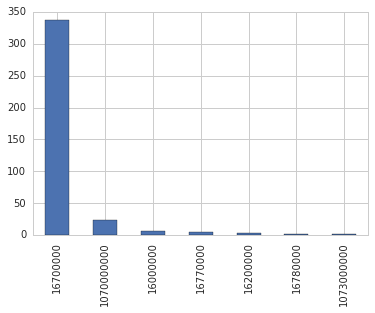

In [191]:
df[df.Display_Colors.notnull()].Display_Colors.value_counts().plot(kind='bar')

(array([    0.,   500.,  1000.,  1500.,  2000.,  2500.]),
 <a list of 6 Text yticklabel objects>)

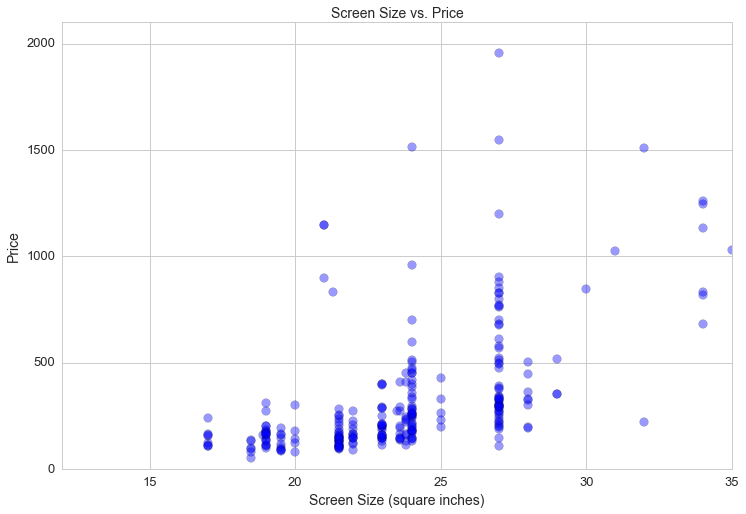

In [71]:
df1 = df[df.avg>0]
plt.figure(figsize=(12,8))
plt.scatter(df1.screen_size,df1.avg, s=75, alpha=.4)
plt.axis([12,35,0,2100])
plt.title('Screen Size vs. Price', fontsize=14)
plt.xlabel('Screen Size (square inches)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/screen_size.png'))

In [44]:
df['Pricing_'] = [ast.literal_eval(x) for x in df.Pricing]

In [45]:
def score_vendors(prices):
    mean = np.mean([prices[x] for x in prices])
    std = np.std([prices[x] for x in prices])
    def z_score(std, mean, price):
        diff = float(price - mean)
        z_score = diff/std
        return z_score
    vendor_dict = {}
    for x in prices:
        vendor_z_score = z_score(std, mean, prices[x])
        vendor_dict[x] = vendor_z_score
    return vendor_dict

In [46]:
vendor_z_score_list = []
for x in df.Pricing_:
    z_score_dict = score_vendors(x)
    vendor_z_score_list.append(z_score_dict)

In [47]:
vend_df = pd.DataFrame(vendor_z_score_list)

In [48]:
vendor_count = {}
for x in vend_df.columns:
    vendor_count[x] = vend_df[x].dropna().count()

In [49]:
vendor_count_chart = pd.DataFrame(vendor_count, index=[0])

In [50]:
sns.set_style('whitegrid')

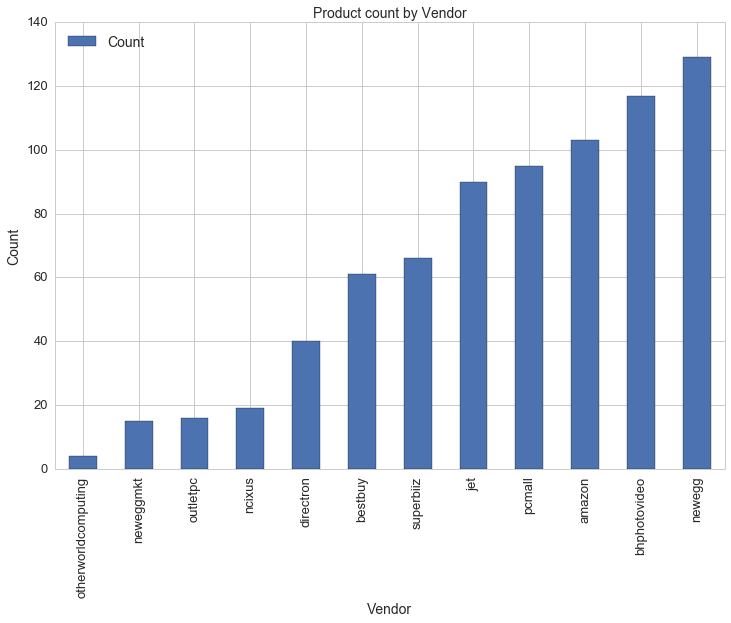

In [72]:
vendor_count_chart.T.sort_values(by=0, ascending=True).plot(kind='bar', figsize=(12,8))
plt.title('Product count by Vendor', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Vendor', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Count'], fontsize=14, loc='upper left')
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/monitors_by_vendor.png'))

In [52]:
vendor_avg = {}
for x in vend_df.columns:
    vendor_avg[x] = vend_df[x].dropna().sum()/vend_df[x].dropna().count()

In [53]:
vendor_avg = {}
for x in vend_df.columns:
    vendor_avg[x] = vend_df[x].dropna().sum()/vend_df[x].dropna().count()

In [54]:
vendor_avg_chart = pd.DataFrame(vendor_avg, index=[0])

In [55]:
sns.set_style('whitegrid')

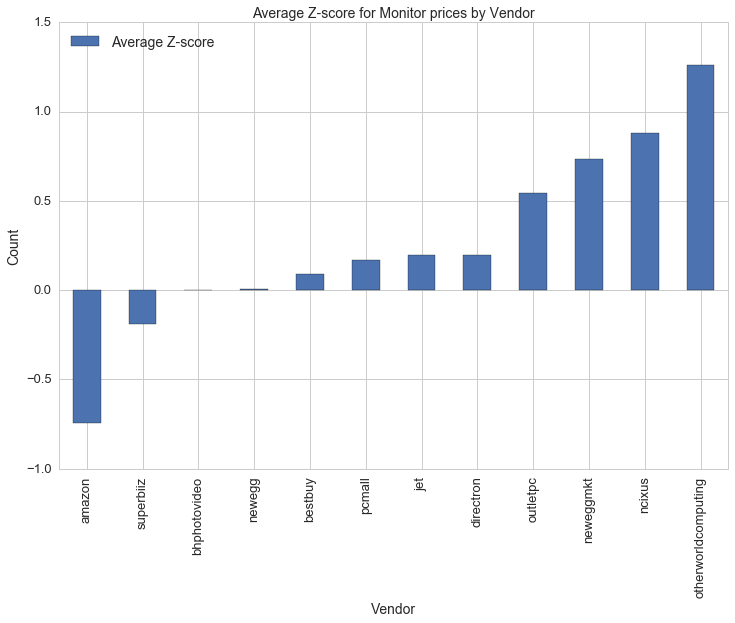

In [74]:
vendor_avg_chart.T.sort_values(by=0, ascending=True).plot(kind='bar', figsize=(12,8))
plt.title('Average Z-score for Monitor prices by Vendor', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Vendor', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['Average Z-score'], loc='upper left', fontsize=14)
plt.savefig(os.path.expanduser('~/Documents/GitHub/briancaffey.github.io/img/monitor/average_z_score_by_vendor.png'))